In [29]:
import pandas as pd
import numpy as np

In [30]:
GMM=pd.read_csv("/home/spoudel/Thesis/Data/Lathrope/train_test/train/GMM_predicted.csv")
KMean=pd.read_csv("/home/spoudel/Thesis/Data/Lathrope/train_test/train/KMeans_predicted.csv")
KMean

,Unnamed: 0,Unnamed: 0.1,timestamp,total_power,p0,p1,p2,p3,p4,p5,p6,K_Means
0,0,0,2022-09-29T15:32:00.255000Z,0.903975,-0.874080,0.457777,2.000000,2.000000,2.000000,2.000000,0.775986,5
1,1,1,2022-09-29T15:32:00.383000Z,-0.850796,-0.842891,-0.557550,-0.575725,-0.536052,-0.493993,-0.426373,-0.502608,0
2,2,2,2022-09-29T15:32:00.511000Z,-0.868921,-0.855945,-0.601083,-0.579232,-0.535855,-0.499467,-0.435050,-0.513740,0
3,3,3,2022-09-29T15:32:00.639000Z,-0.881959,-0.875006,-0.602147,-0.578875,-0.561164,-0.473057,-0.437372,-0.524266,0
4,4,4,2022-09-29T15:32:00.767000Z,-0.881974,-0.873990,-0.602932,-0.574325,-0.540357,-0.502455,-0.434504,-0.523742,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6028,6028,6028,2022-09-29T15:44:59.483000Z,-0.885068,-0.875243,-0.603128,-0.580944,-0.565439,-0.503714,-0.436152,-0.524747,0
6029,6029,6029,2022-09-29T15:44:59.611000Z,-0.884633,-0.875255,-0.603125,-0.581119,-0.563538,-0.500041,-0.437138,-0.524150,0
6030,6030,6030,2022-09-29T15:44:59.739000Z,-0.882703,-0.875246,-0.601668,-0.581475,-0.563626,-0.500403,-0.435309,-0.519699,0
6031,6031,6031,2022-09-29T15:44:59.867000Z,-0.883680,-0.875247,-0.603105,-0.579910,-0.565530,-0.500806,-0.436144,-0.521572,0


In [31]:
GMM["prev"]=GMM["GMM"].shift(1)
GMM["change"]=GMM.apply(lambda x: x["prev"]-x["GMM"],axis=1)
GMM["pss_change"]=GMM.apply(lambda x: abs(x["change"]),axis=1)
GMM

,Unnamed: 0,Unnamed: 0.1,timestamp,total_power,p0,p1,p2,p3,p4,p5,p6,GMM,prev,change,pss_change
0,0,0,2022-09-29T15:32:00.255000Z,0.903975,-0.874080,0.457777,2.000000,2.000000,2.000000,2.000000,0.775986,5,NaN,NaN,NaN
1,1,1,2022-09-29T15:32:00.383000Z,-0.850796,-0.842891,-0.557550,-0.575725,-0.536052,-0.493993,-0.426373,-0.502608,2,5.0,3.0,3.0
2,2,2,2022-09-29T15:32:00.511000Z,-0.868921,-0.855945,-0.601083,-0.579232,-0.535855,-0.499467,-0.435050,-0.513740,2,2.0,0.0,0.0
3,3,3,2022-09-29T15:32:00.639000Z,-0.881959,-0.875006,-0.602147,-0.578875,-0.561164,-0.473057,-0.437372,-0.524266,0,2.0,2.0,2.0
4,4,4,2022-09-29T15:32:00.767000Z,-0.881974,-0.873990,-0.602932,-0.574325,-0.540357,-0.502455,-0.434504,-0.523742,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028,6028,6028,2022-09-29T15:44:59.483000Z,-0.885068,-0.875243,-0.603128,-0.580944,-0.565439,-0.503714,-0.436152,-0.524747,0,0.0,0.0,0.0
6029,6029,6029,2022-09-29T15:44:59.611000Z,-0.884633,-0.875255,-0.603125,-0.581119,-0.563538,-0.500041,-0.437138,-0.524150,0,0.0,0.0,0.0
6030,6030,6030,2022-09-29T15:44:59.739000Z,-0.882703,-0.875246,-0.601668,-0.581475,-0.563626,-0.500403,-0.435309,-0.519699,0,0.0,0.0,0.0
6031,6031,6031,2022-09-29T15:44:59.867000Z,-0.883680,-0.875247,-0.603105,-0.579910,-0.565530,-0.500806,-0.436144,-0.521572,0,0.0,0.0,0.0


In [32]:
KMean["prev"]=KMean["K_Means"].shift(1)
KMean["change"]=KMean.apply(lambda x: x["prev"]-x["K_Means"],axis=1)
KMean["pss_change"]=KMean.apply(lambda x: abs(x["change"]),axis=1)
KMean

,Unnamed: 0,Unnamed: 0.1,timestamp,total_power,p0,p1,p2,p3,p4,p5,p6,K_Means,prev,change,pss_change
0,0,0,2022-09-29T15:32:00.255000Z,0.903975,-0.874080,0.457777,2.000000,2.000000,2.000000,2.000000,0.775986,5,NaN,NaN,NaN
1,1,1,2022-09-29T15:32:00.383000Z,-0.850796,-0.842891,-0.557550,-0.575725,-0.536052,-0.493993,-0.426373,-0.502608,0,5.0,5.0,5.0
2,2,2,2022-09-29T15:32:00.511000Z,-0.868921,-0.855945,-0.601083,-0.579232,-0.535855,-0.499467,-0.435050,-0.513740,0,0.0,0.0,0.0
3,3,3,2022-09-29T15:32:00.639000Z,-0.881959,-0.875006,-0.602147,-0.578875,-0.561164,-0.473057,-0.437372,-0.524266,0,0.0,0.0,0.0
4,4,4,2022-09-29T15:32:00.767000Z,-0.881974,-0.873990,-0.602932,-0.574325,-0.540357,-0.502455,-0.434504,-0.523742,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028,6028,6028,2022-09-29T15:44:59.483000Z,-0.885068,-0.875243,-0.603128,-0.580944,-0.565439,-0.503714,-0.436152,-0.524747,0,0.0,0.0,0.0
6029,6029,6029,2022-09-29T15:44:59.611000Z,-0.884633,-0.875255,-0.603125,-0.581119,-0.563538,-0.500041,-0.437138,-0.524150,0,0.0,0.0,0.0
6030,6030,6030,2022-09-29T15:44:59.739000Z,-0.882703,-0.875246,-0.601668,-0.581475,-0.563626,-0.500403,-0.435309,-0.519699,0,0.0,0.0,0.0
6031,6031,6031,2022-09-29T15:44:59.867000Z,-0.883680,-0.875247,-0.603105,-0.579910,-0.565530,-0.500806,-0.436144,-0.521572,0,0.0,0.0,0.0


(array([ 0.,  1.,  2.,  3.,  4.,  5., nan]), array([4518,  894,  498,  100,   21,    1,    1]))


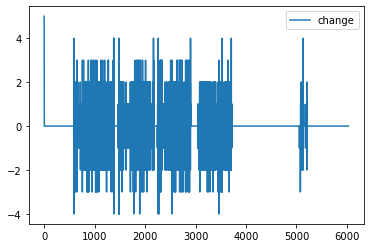

In [33]:
print(np.unique(np.array(KMean["pss_change"]), return_counts=True))
KMean.plot(y="change")

(array([ 0.,  1.,  2.,  3.,  4., nan]), array([4547,  694,  575,  205,   11,    1]))


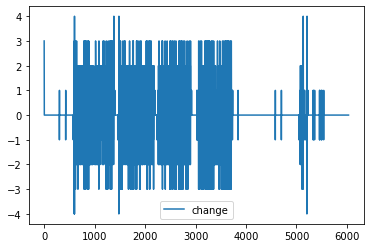

In [34]:
print(np.unique(np.array(GMM["pss_change"]), return_counts=True))
GMM.plot(y="change")